In [21]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [22]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['.', '.', '.', '.', 'F', 'O', '.', '.']

□ □ □ X □
□ ■ ■ $ □
□ ■ ■ ■ □
□ ■ ■ ■ □
□ □ □ □ □


In [23]:
from lcs.agents.xncs import XNCS, Configuration

def cl_accuracy(cl, cfg):
     if cl.error < cfg.epsilon_0:
        return 1
     else:
        return cfg.alpha * pow(1/(cl.error * cfg.epsilon_0), cfg.v)
            
def fraction_accuracy(xncs):
    action_sets_percentages = []
    for action in range(xncs.cfg.number_of_actions):
        action_set = xncs.population.generate_action_set(action)
        total_accuracy = 0
        most_numerous = action_set[0]
        for cl in action_set:
            total_accuracy += cl_accuracy(cl, xncs.cfg)
            if cl.numerosity > most_numerous.numerosity:
                most_numerous = cl
        action_sets_percentages.append(cl_accuracy(most_numerous, xncs.cfg) / total_accuracy)
    return sum(action_sets_percentages) / xncs.cfg.number_of_actions

def specificity(xncs, population):
    total_specificity = 0
    for cl in population:
        total_specificity += pow(2, cl.wildcard_number)
    return total_specificity / xncs.population.numerosity

def xcs_maze_metrics(xncs: XNCS, environment):
    return {
        'numerosity': xncs.population.numerosity,
        'population': len(xncs.population),
        'average_specificity': specificity(xncs, xncs.population),
        'fraction_accuracy': fraction_accuracy(xncs)
    }

In [24]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics,
                    lmc=10,
                    lem=200)

In [25]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 3000, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 2, 'reward': [0, 0, 0, 0, 1.9621374957174576e-77, 0, 0, 200.0], 'numerosity': 16, 'population': 16, 'average_specificity': 2.3125, 'fraction_accuracy': 0.5}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 1, 'reward': [1.3720899024053952, 0.9877142980910496, 2.182060037794574, 0.989330059845406, 252.35774460317688, 213.18707050674146, 4.127682693993175, 518.0363693648469], 'numerosity': 254, 'population': 130, 'average_specificity': 2.0669291338582676, 'fraction_accuracy': 0.1582650325342684}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1, 'reward': [0.30962928653591115, 0.2973917617869148, 0.2847067800466185, 0.5908659940866714, 102.58247236103068, 2.463166386176387, 20.936645649287648, 492.89800467544535], 'numerosity': 258, 'population': 130, 'average_specificity': 2.0387596899224807, 'fraction_accuracy': 0.23287178390923113}
INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 20, 'reward': [1.304807124345817, 

In [26]:
for cl in explore_population:
    print(str(cl))

Cond:.....O#. - Act:0 - Num:3 [fit: 0.000000, exp: 136.00, pred: 235.388, error:24.870404556491216]
Cond:#....OF. - Act:1 - Num:3 [fit: 0.000000, exp: 149.00, pred: 231.221, error:31.00254257083585]
Cond:......F. - Act:2 - Num:3 [fit: 0.064000, exp: 3.00, pred: 310.027, error:11.842203890478592]
Cond:.#...OF. - Act:3 - Num:3 [fit: 0.000000, exp: 287.00, pred: 258.152, error:31.367764779551226]
Cond:.#...OF. - Act:4 - Num:2 [fit: 0.000000, exp: 627.00, pred: 358.631, error:92.49734437480814]
Cond:.....### - Act:5 - Num:3 [fit: 0.000000, exp: 2358.00, pred: 276.763, error:747.5850086752405]
Cond:..#..OF# - Act:6 - Num:2 [fit: 0.000000, exp: 622.00, pred: 242.935, error:45.54767188324065]
Cond:.##..O#. - Act:7 - Num:2 [fit: 0.000000, exp: 612.00, pred: 255.710, error:39.379704885889545]
Cond:.#.#.OO# - Act:0 - Num:3 [fit: 0.000000, exp: 236.00, pred: 225.568, error:21.605342986505804]
Cond:#.#..OO# - Act:1 - Num:3 [fit: 0.000000, exp: 211.00, pred: 233.235, error:19.70684581753789]
Cond:.

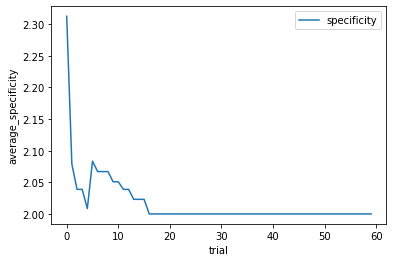

In [27]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


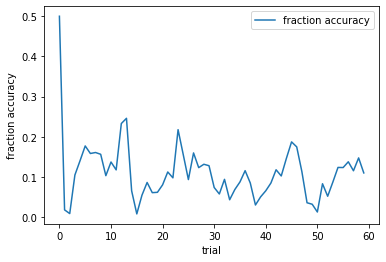

In [28]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


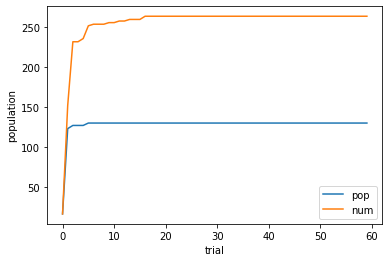

In [29]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


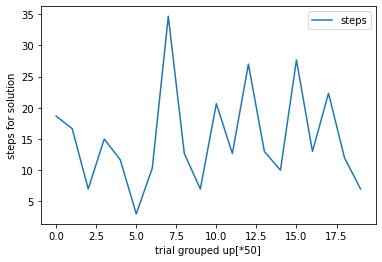

In [30]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
